<a href="https://colab.research.google.com/github/livjab/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Liv_Johnson_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading data into df

survival_df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", header=None)
survival_df.head()


,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# validating number of observations
survival_df.shape

(306, 4)

In [5]:
# validating no missing values

survival_df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [0]:
# adding header names

survival_df.columns = ["Age", "Year of Operation", "Nodes Detected", "Survival"]

In [7]:
# changing binary variables

survival_df["Survival"] = survival_df["Survival"].replace(2,0)

survival_df.head()

,Age,Year of Operation,Nodes Detected,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# TODO

In [8]:
# creating crosstabulation of nodes detected versus survival

node_bin = pd.cut(survival_df["Nodes Detected"], 8)

node_survival_ct = pd.crosstab(node_bin, survival_df["Survival"])
node_survival_ct

Survival,0,1
Nodes Detected,,
"(-0.052, 6.5]",49,194
"(6.5, 13.0]",17,17
"(13.0, 19.5]",6,7
"(19.5, 26.0]",7,4
"(26.0, 32.5]",0,2
"(32.5, 39.0]",1,0
"(39.0, 45.5]",0,0
"(45.5, 52.0]",1,1


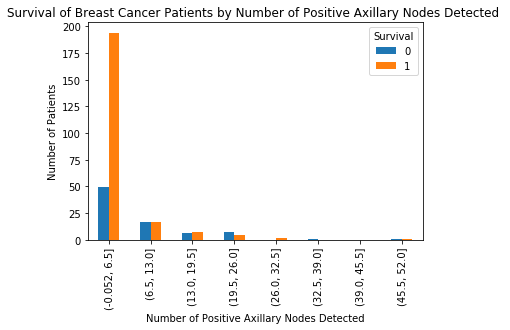

In [9]:
ax = node_survival_ct.plot(kind='bar')

ax.set_title("Survival of Breast Cancer Patients by Number of Positive Axillary Nodes Detected ")
ax.set_xlabel("Number of Positive Axillary Nodes Detected")
ax.set_ylabel("Number of Patients")

plt.show()

In [10]:
# summary statistics of age and the relationship with survival

survival_df["Age"].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age, dtype: float64

In [0]:
# going to make a box plot of age vs survival
import seaborn as sns

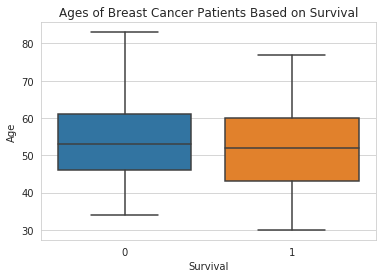

In [12]:
sns.set_style("whitegrid")

ax1 = sns.boxplot(x=survival_df["Survival"], y=survival_df["Age"], data=survival_df)

ax1.set_title("Ages of Breast Cancer Patients Based on Survival")
plt.show()

In [13]:
# exploring year of operation vs survival

year_bin = pd.cut(survival_df["Year of Operation"], 10)

year_survival_ct = pd.crosstab(year_bin, survival_df["Survival"])
year_survival_ct

Survival,0,1
Year of Operation,,
"(57.989, 59.1]",21,42
"(59.1, 60.2]",4,24
"(60.2, 61.3]",3,23
"(61.3, 62.4]",7,16
"(62.4, 63.5]",8,22
"(63.5, 64.6]",8,23
"(64.6, 65.7]",13,15
"(65.7, 66.8]",6,22
"(66.8, 67.9]",4,21


In [45]:
# newer version of seaborn not working and I want catplot!

!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 23.0MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
age_bins = pd.cut(survival_df["Age"], 6)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: ignored

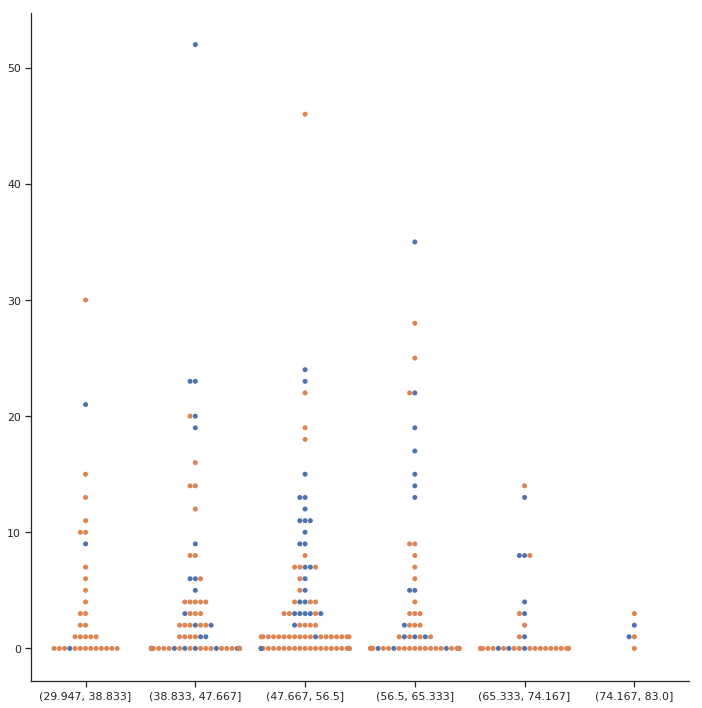

In [62]:
# going to try to show 3 variables using a catplot

ax2 = sns.catplot(x=age_bins, y=survival_df["Nodes Detected"], 
            hue=survival_df["Survival"], kind="swarm", 
            data=survival_df, size=10)

plt.xlabel('Age')
plt.ylabel('Number of Nodes')
plt.title('Breast Cancer Survival')
plt.show()


In [0]:
# I believe these errors are coming from the "Survival" category being boolean, 
# but I'm not sure how to fix this. Plot still works, althought the legend,
# title, and labels are not showing up.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

# My Answers

- The lower the number of positive nodes detected, the higher the survial rate.
- The older the patient, the lower the survival rate.
- There is not an obvious relationship between age and number of nodes detected (see plot below.) I believe there are other confounding variables that we cannot see here which are affecting the suvival rate. It seems that being younger and having fewer nodes will increase the chances of survival, but we can not conclude that those are the only factors at play.



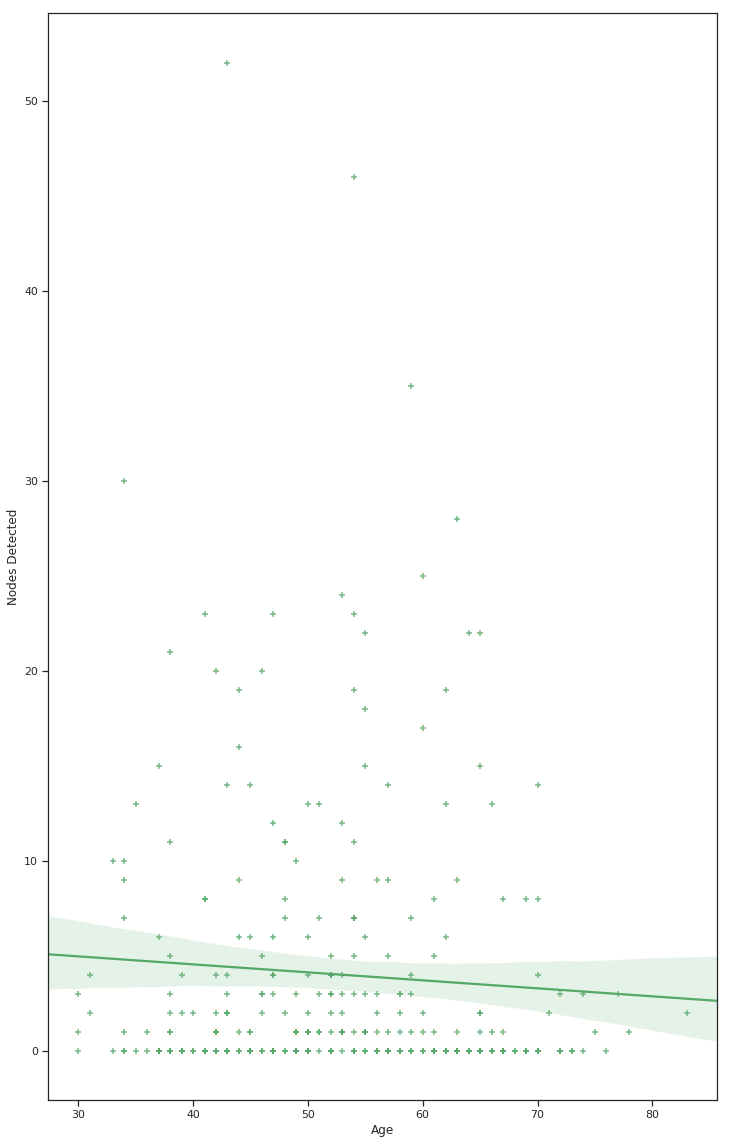

In [63]:
# scatter plot of nodes and age

ax3 = sns.regplot(x=survival_df["Age"], y=survival_df["Nodes Detected"], color="g", marker='+')
plt.show()